# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
'''%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()'''

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [5]:
def q1():
    quartis = [np.quantile(dataframe.normal, i) - np.quantile(dataframe.binomial, i) for i in [0.25, 0.5, 0.75]]
    return tuple(np.round(quartis, 3))

Para refletir:

* Você esperava valores dessa magnitude?

    Sim, era esperado valores dessa magnitude, tendo em vista que as amostras foram geradas com médias semelhantes, pois a aproximação da distribuição binomial com a distribuição normal se dá quando a amostra é grande e a probabilidade $p$ se aproxima de 0.5, como no caso do quartil 0.5, em que a diferença ficou apenas em -0.01.
    

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

    Para amostras discretas suficientemente grandes a distribuição tende a ir ganhando uma forma de curva normal, pois, segundo o teorema central do limite, a média de uma amostra de $n$ elementos tende sempre a uma distribuição normal. Desta forma, apesar de as distribuições mostradas serem originalmente diferentes, como há uma quantidade grande da amostra binomial e como as médias das amostras são valores próximos, há essa aproximação com a distruibuição normal, principalmente no quartil 0.5(mediano), cujo valor, neste caso, se equipara a média do espaço amostral.

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [6]:
def q2():
    dist_emp = ECDF(dataframe.normal)
    prob1 = dist_emp(dataframe.normal.mean() + dataframe.normal.std())
    prob2 = dist_emp(dataframe.normal.mean() - dataframe.normal.std())
    result = np.round((prob1-prob2), 3)
    return float(result)

Para refletir:

* Esse valor se aproxima do esperado teórico?

    Sim, pois em uma curva de distribuição normal teórica o intervalo a 1 desvio padrão é de 68.27% da amostra, valor próximo ao valor teórico encontrado.
    
    
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [42]:
#Intervalo de uma distribuição normal empírica a 2 desvios padrões é de 95,44%
dist_emp = ECDF(dataframe.normal)
prob1 = dist_emp(dataframe.normal.mean() + (2* dataframe.normal.std()))
prob2 = dist_emp(dataframe.normal.mean() - (2* dataframe.normal.std()))
prob1 - prob2

0.9538

In [43]:
#Intervalo de uma distribuição normal empírica a 3 desvios padrões é de 99,73%
dist_emp = ECDF(dataframe.normal)
prob1 = dist_emp(dataframe.normal.mean() + (3* dataframe.normal.std()))
prob2 = dist_emp(dataframe.normal.mean() - (3* dataframe.normal.std()))
prob1 - prob2

0.9973000000000001

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [7]:
def q3():
    dif_medias = dataframe.binomial.mean() - dataframe.normal.mean()
    dif_variancias = dataframe.binomial.var() - dataframe.normal.var()
    return tuple(np.round((dif_medias, dif_variancias), 3))

Para refletir:

* Você esperava valores dessa magnitude?

    Sim, as amostras foram geradas com médias semelhantes e, sendo uma quantidade razoavelmente grande de amostras, geram pouca diferená de variância por a distribuição binomial se aproximar da distribuição normal.
    
    
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?
    
    Alterando-se apenas o $n$, sem se alterar o $p$, os valores de diferenças tendem a ser mais significativos, pois os valores de média das duas amostras tendem a se afastar.

## Parte 2

### _Setup_ da parte 2

In [5]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [6]:
false_pulsar = stars[stars.target == False] ['mean_profile']
false_pulsar_mean_profile_standardized = (false_pulsar - false_pulsar.mean())/false_pulsar.std()
ecdf = ECDF(false_pulsar_mean_profile_standardized)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [10]:
def q4():
    quantis = [sct.norm.ppf(i, loc=0, scale=1) for i in [0.8, 0.9, 0.95]]
    return tuple(np.round(ecdf(quantis), 3))

Para refletir:

* Os valores encontrados fazem sentido?

    Sim, os valores apresentados se aproximam dos valores dos quantis acumulados por estarmos diante de uma distruibição próxima à distruibição normal que foi padronizada com média 0 e variância 1, de maneira que os valores encontrados nos quantis irão corresponder ao percentual do quantil escolhido.
    
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

    Isso é um sinal que a distribuição dessa variável é uma distruibição normal, fato que podemos comprovar, inclusive, pelo gráfico abaixo.

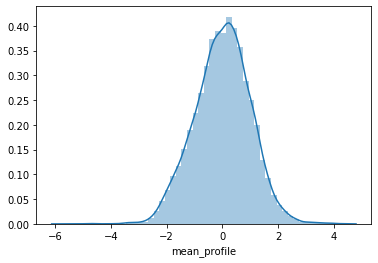

In [7]:
sns.distplot(false_pulsar_mean_profile_standardized);

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [11]:
def q5():
    return tuple(np.round([np.quantile(false_pulsar_mean_profile_standardized, i) - sct.norm.ppf(i, loc=0, scale=1) for i in [0.25, 0.5, 0.75]], 3))

Para refletir:

* Os valores encontrados fazem sentido?

    Sim, os valores da diferença dos quartis é próxima de 0, pois a variável `false_pulsar_mean_profile_standardized` foi padronizada para se ter média 0 e variância 1, e sendo a distribuição da variável original considerada uma distruibição normal, os valores tendem a ser semelhantes aos quantis teóricos de uma distribuição normal.
    
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

    Isso quer dizer que a variável `false_pulsar_mean_profile_standardized`tem uma distribuição normal, como é possível visualizar pelo gráfico abaixo.
    
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.

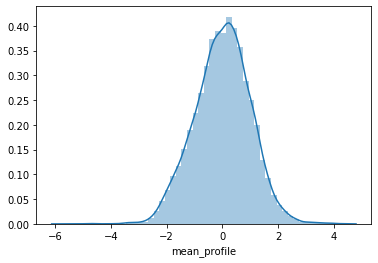

In [8]:
sns.distplot(false_pulsar_mean_profile_standardized);